In [20]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

In [21]:
# Function to perform Monte Carlo simulation for stock price movement
def monte_carlo_simulation(initial_price, drift, volatility, time_horizon, num_simulations):
    dt = 1  # Time interval (1 year)
    num_steps = int(time_horizon / dt)  # Number of time steps

    # Generate random numbers for each simulation and each time step
    random_numbers = np.random.randn(num_simulations, num_steps)

    # Calculate stock price trajectories for each simulation
    stock_prices = np.zeros((num_simulations, num_steps+1))  # Adjusted array shape
    stock_prices[:, 0] = initial_price  # Set initial stock price

    for i in range(1, num_steps+1):  # Adjusted loop range
        # Calculate drift term
        drift_term = drift * dt * i

        # Calculate volatility term
        volatility_term = volatility * np.sqrt(dt) * random_numbers[:, i-1]  # Adjusted indexing

        # Update stock prices using GBM equation
        stock_prices[:, i] = stock_prices[:, i-1] * np.exp(drift_term + volatility_term)  # Adjusted indexing

    return stock_prices

In [22]:
# Parameters for simulation
initial_price = 100  # Initial stock price
drift = 0.05  # Drift rate (5% per year)
volatility = 0.2  # Volatility (20% per year)
time_horizon = 3  # Time horizon (5 years)
num_simulations = 10  # Number of simulations

# Perform Monte Carlo simulation
simulated_prices = monte_carlo_simulation(initial_price, drift, volatility, time_horizon, num_simulations)

In [23]:
# Calculate skewness and kurtosis of simulated stock prices
skewness = skew(simulated_prices[:, -1])
kurt = kurtosis(simulated_prices[:, -1], fisher=False)

print(f'Skewness of simulated stock prices: {skewness}')
print(f'Kurtosis of simulated stock prices: {kurt}')


Skewness of simulated stock prices: 1.2622241807169932
Kurtosis of simulated stock prices: 3.482475378870919


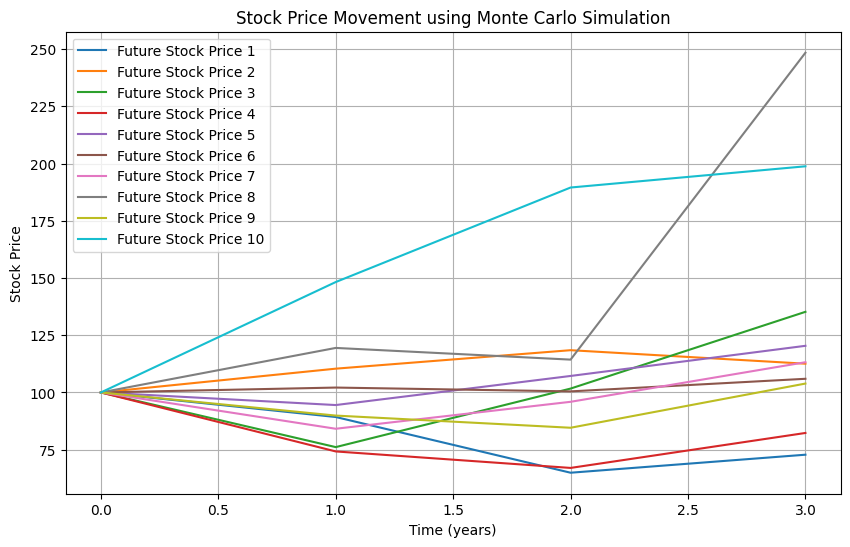

In [24]:
# Calculate number of steps
dt = 1  # Time interval (1 year)
num_steps = int(time_horizon / dt)  # Number of time steps

# Plot stock price trajectories
plt.figure(figsize=(10, 6))
for i in range(num_simulations):
    plt.plot(np.linspace(0, time_horizon, num_steps+1), simulated_prices[i], label=f'Future Stock Price {i+1}')  # Adjusted x-axis values
plt.title('Stock Price Movement using Monte Carlo Simulation')
plt.xlabel('Time (years)')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()